# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [ ]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [ ]:
# Load the dataset
df = pd.read_csv("Employee_data.csv")

In [ ]:
# Check the first few entries
df.head()


Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [ ]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [ ]:
# Inspect the different columns in the dataset
df.columns


Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [ ]:
# Check the summary of the dataset
df.describe(include = "all")


Employee ID           Age Gender  Years at Company    Job Role  \
count   74610.000000  74610.000000  74610      74610.000000       74610   
unique           NaN           NaN      2               NaN           5   
top              NaN           NaN   Male               NaN  Technology   
freq             NaN           NaN  40898               NaN       19350   
mean    37246.028696     38.529379    NaN         15.722638         NaN   
std     21505.785344     12.082299    NaN         11.224059         NaN   
min         1.000000     18.000000    NaN          1.000000         NaN   
25%     18624.250000     28.000000    NaN          7.000000         NaN   
50%     37239.500000     39.000000    NaN         13.000000         NaN   
75%     55871.750000     49.000000    NaN         23.000000         NaN   
max     74498.000000     59.000000    NaN         51.000000         NaN   

        Monthly Income Work-Life Balance Job Satisfaction Performance Rating  \
count     74610.000000             74610            74610              74610   
unique             NaN                 4                4                  4   
top                NaN              Good             High            Average   
freq               NaN             28196            37306              44786   
mean       7344.931417               NaN              NaN                NaN   
std        2596.373589               NaN              NaN                NaN   
min        1226.000000               NaN              NaN                NaN   
25%        5652.000000               NaN              NaN                NaN   
50%        7348.500000               NaN              NaN                NaN   
75%        8876.000000               NaN              NaN                NaN   
max       50030.000000               NaN              NaN                NaN   

        Number of Promotions  ... Number of Dependents  Job Level  \
count           74610.000000  ...         74610.000000      74610   
unique                   NaN  ...                  NaN          3   
top                      NaN  ...                  NaN      Entry   
freq                     NaN  ...                  NaN      29820   
mean                0.832958  ...             1.657432        NaN   
std                 0.995326  ...             1.579862        NaN   
min                 0.000000  ...             0.000000        NaN   
25%                 0.000000  ...             0.000000        NaN   
50%                 1.000000  ...             1.000000        NaN   
75%                 2.000000  ...             3.000000        NaN   
max                 4.000000  ...            15.000000        NaN   

       Company Size Company Tenure (In Months)  Remote Work  \
count         74610               72197.000000        74610   
unique            3                        NaN            2   
top          Medium                        NaN           No   
freq          37281                        NaN        60390   
mean            NaN                  55.711899          NaN   
std             NaN                  25.392325          NaN   
min             NaN                   2.000000          NaN   
25%             NaN                  36.000000          NaN   
50%             NaN                  56.000000          NaN   
75%             NaN                  76.000000          NaN   
max             NaN                 128.000000          NaN   

       Leadership Opportunities Innovation Opportunities  Company Reputation  \
count                     74610                    74610               74610   
unique                        2                        2                   4   
top                          No                       No                Good   
freq                      70952                    62486               37241   
mean                        NaN                      NaN                 NaN   
std                         NaN                      NaN                 NaN   
m

### **1.3 Check the data type of columns**

In [ ]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [ ]:
# Check the number of missing values in each column
pd.set_option('display.max_rows',None)
df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [ ]:
# Check the percentage of missing values in each column
# calculate the percentage of missing values in Distance from Home column.
print(float(100.0*1912/74610))
# calculate the percentage of missing values in Company Tenure (In Months) column.
print(float(100.0*2413/74610))
def find_xna_columns(df):
  """
  Finds columns in a DataFrame containing 'XNA' values.

  Args:
    df: The input DataFrame.

  Returns:
    A list of column names containing 'XNA' values.
  """
  xna_cols = []
  for col in df.columns:
    if df[col].astype(str).str.contains('XNA').any():
      xna_cols.append(col)
  return xna_cols
xna_columns = find_xna_columns(df)
print(f"Columns containing 'XNA': {xna_columns}")


2.5626591609703793
3.2341509181074923
Columns containing 'XNA': []


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [ ]:
# Handle the missing value rows in the column
# Drop rows from 'Distance from Home' where data is null
df = df.dropna(subset=['Distance from Home'])
# Drop rows from 'Company Tenure (In Months)' where data is null
df = df.dropna(subset=['Company Tenure (In Months)'])


2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [ ]:
# Check the percentage of remaining data after missing values are removed
remaining_percentage = (len(df)/74610)*100
print(f"Percentage of remaining data after missing values are removed: {remaining_percentage:.2f}%")


Percentage of remaining data after missing values are removed: 94.67%


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [ ]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def display_unique_values(df):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        print(f"{col}: {df[col].unique()}")
        print("-" * 40)


In [ ]:
# Check the data
# Replace 'Masterâ€™s Degree' 'Bachelorâ€™s Degree' with 'Masters Degree' 'Bachelors Degree' in Education level
df['Education Level'] = df['Education Level'].replace(['Masterâ€™s Degree', 'Bachelorâ€™s Degree'], ['Masters Degree', 'Bachelors Degree'])
# Check unique categorical values
display_unique_values(df)


Gender: ['Male' 'Female']
----------------------------------------
Job Role: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
----------------------------------------
Work-Life Balance: ['Excellent' 'Poor' 'Good' 'Fair']
----------------------------------------
Job Satisfaction: ['Medium' 'High' 'Very High' 'Low']
----------------------------------------
Performance Rating: ['Average' 'Low' 'High' 'Below Average']
----------------------------------------
Overtime: ['No' 'Yes']
----------------------------------------
Education Level: ['Associate Degree' 'Masters Degree' 'Bachelors Degree' 'High School'
 'PhD']
----------------------------------------
Marital Status: ['Married' 'Divorced' 'Single']
----------------------------------------
Job Level: ['Mid' 'Senior' 'Entry']
----------------------------------------
Company Size: ['Medium' 'Small' 'Large']
----------------------------------------
Remote Work: ['No' 'Yes']
----------------------------------------
Leadership Opport

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [ ]:
# Drop redundant columns which are not required for modelling
# Drop Employee_ID
df = df.drop(columns=['Employee ID'])

In [ ]:
# Check first few rows of data
df.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  ...  Number of Dependents Job Level Company Size  \
0       No  ...                     0       Mid       Medium   
1       No  ...                     3       Mid       Medium   
2       No  ...                     3       Mid       Medium   
3       No  ...                     2       Mid        Small   
4      Yes  ...                     0    Senior       Medium   

   Company Tenure (In Months) Remote Work Leadership Opportunities  \
0                        89.0          No                       No   
1                        21.0          No                       No   
2                        74.0          No                       No   
3                        50.0         Yes                       No   
4                        68.0          No                       No   

   Innovation Opportunities Company Reputation Employee Recognition Attrition  
0                        No          Excellent               Medium    Stayed  
1                        No               Fair                  Low    Stayed  
2                        No               Poor                  Low    Stayed  
3                        No               Good               Medium    Stayed  
4                        No               Fair               Medium    Stayed  

[5 rows x 23 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [ ]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [ ]:
# Put all the feature variables in X
X = df.drop(columns=['Attrition'])

# Put the target variable in y
y = df['Attrition']


### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [ ]:
# Split the data into 70% train data and 30% validation data
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [ ]:
# Select numerical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

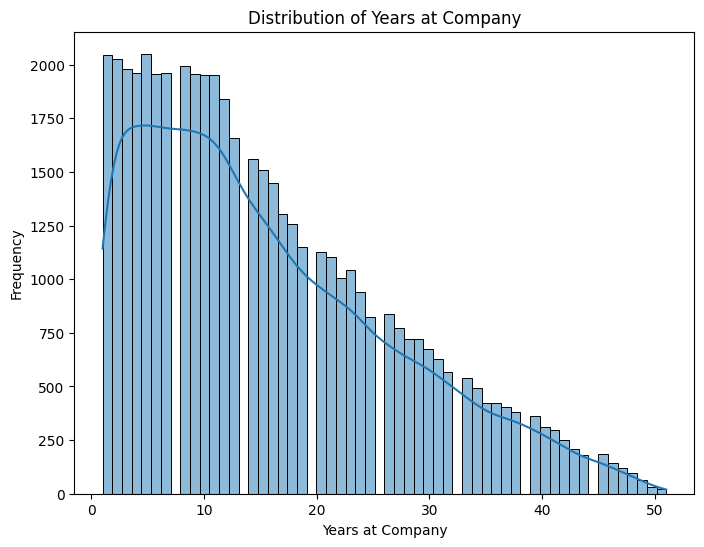

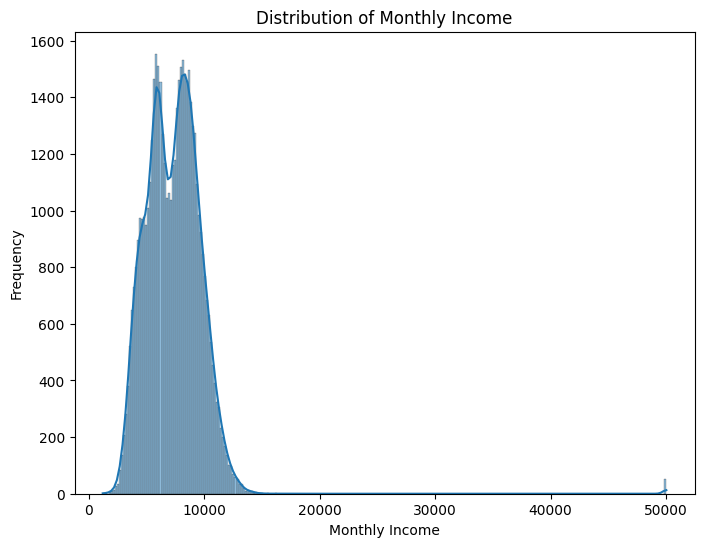

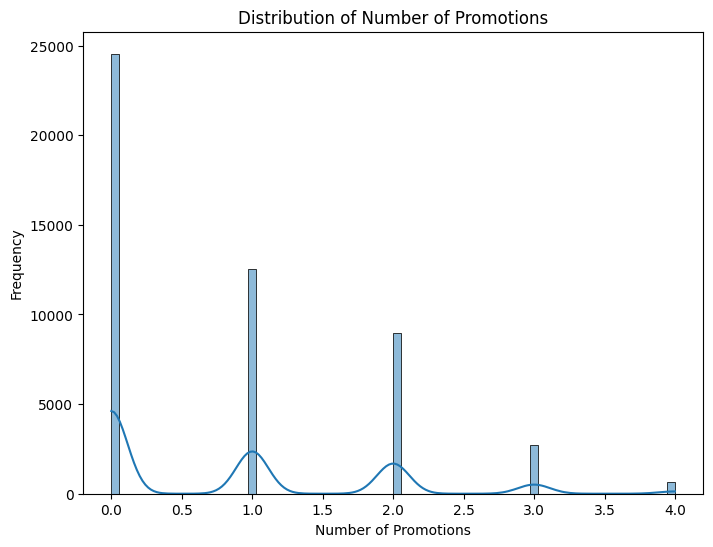

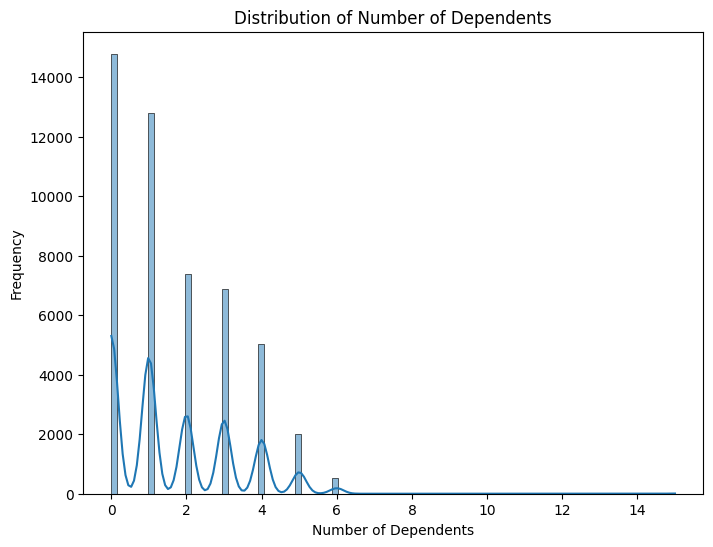

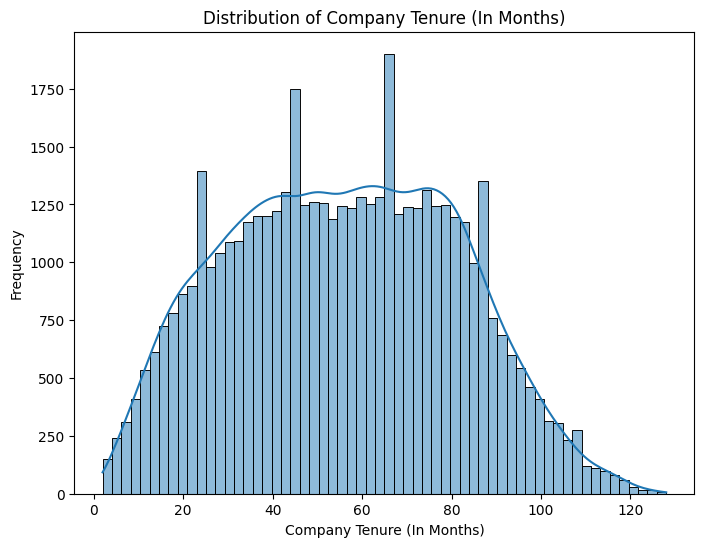

In [ ]:
# Plot all the numerical columns to understand their distribution
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Plot distribution for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(X_train[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    plt.close()


### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

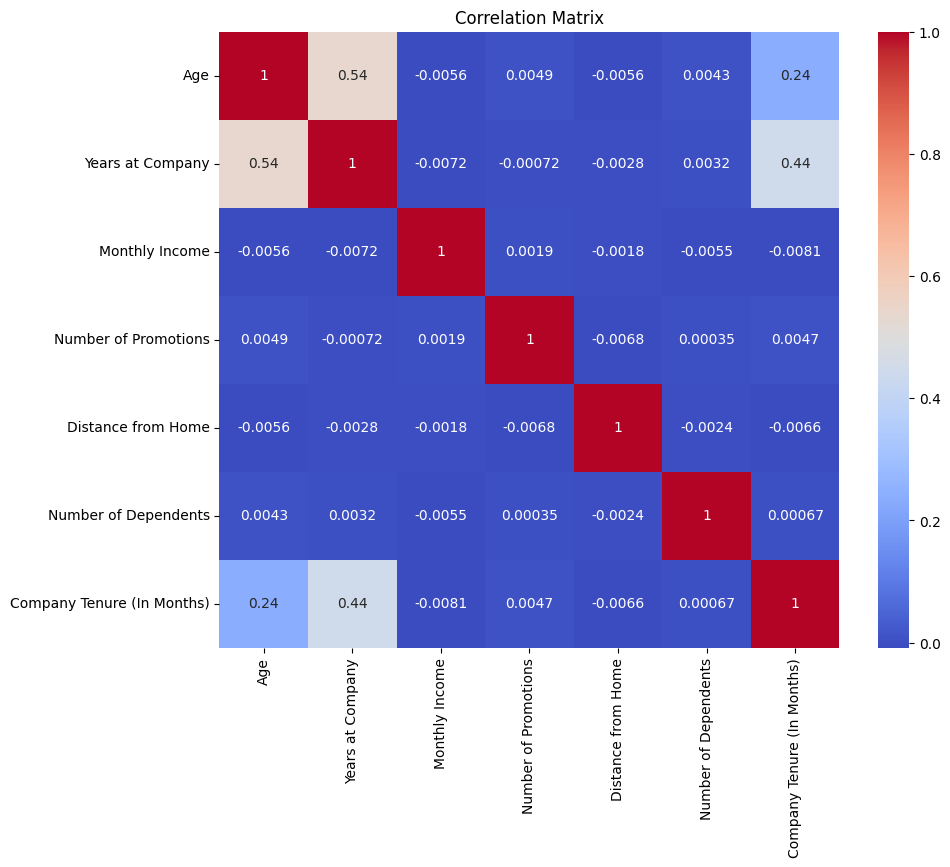

In [ ]:
# Create correlation matrix for numerical columns
correlation_matrix = X_train[numerical_columns].corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

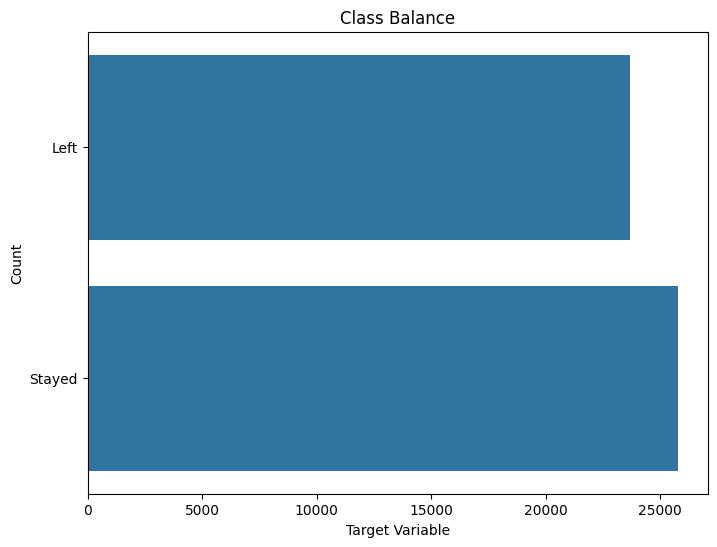

In [ ]:
# Plot a bar chart to check class balance
plt.figure(figsize=(8, 6))
sns.countplot(y_train)
plt.title('Class Balance')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()



### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

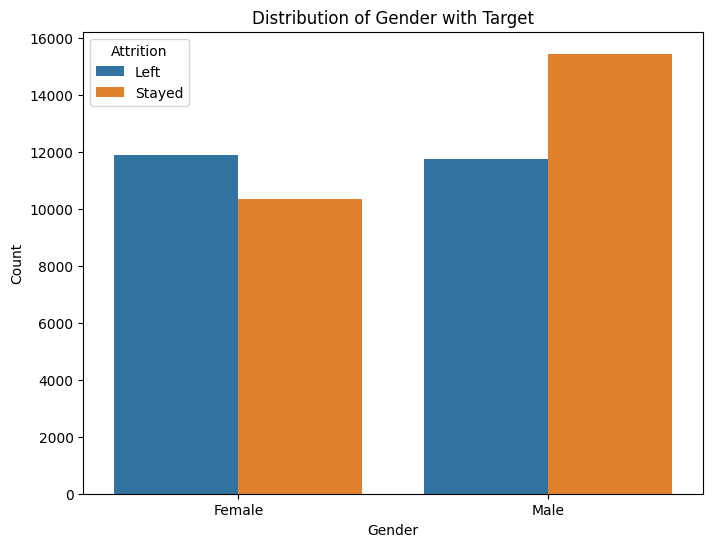

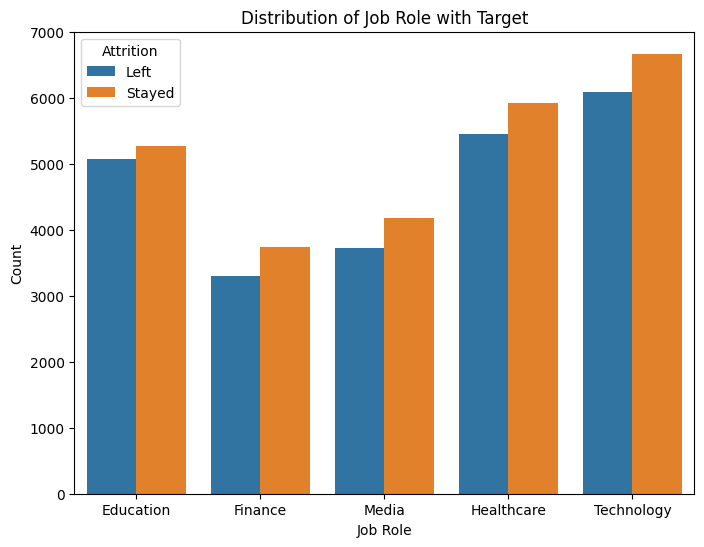

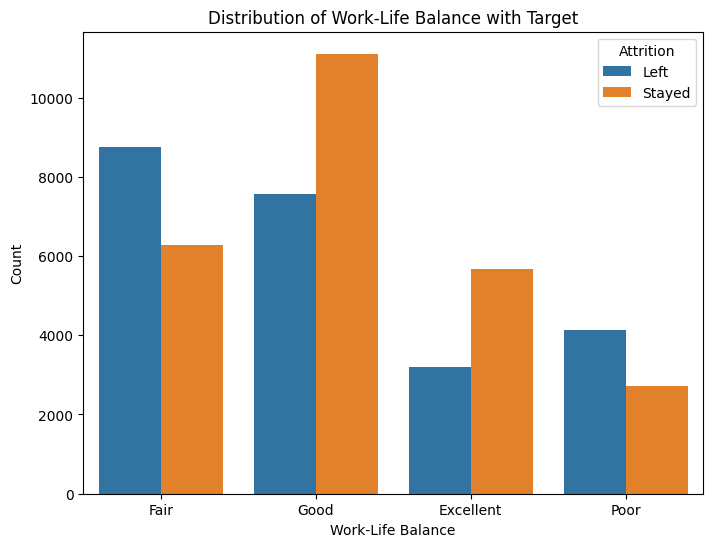

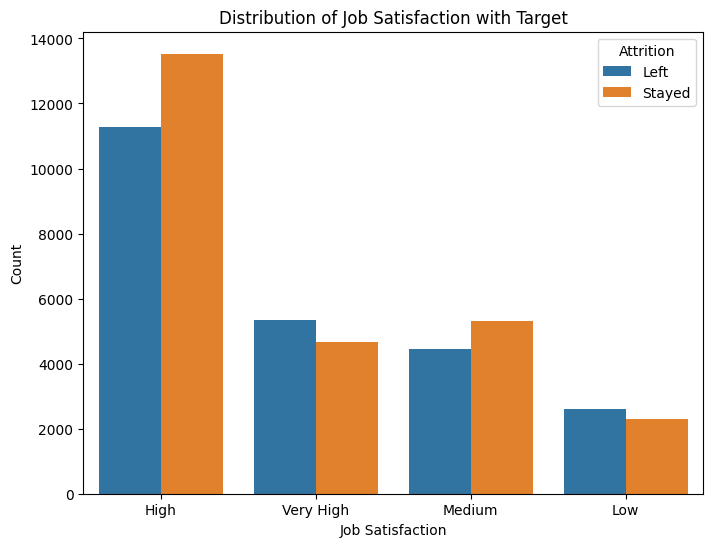

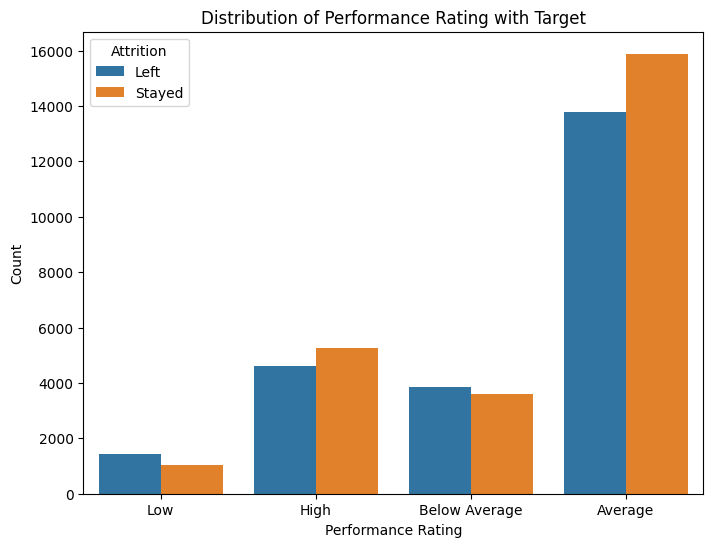

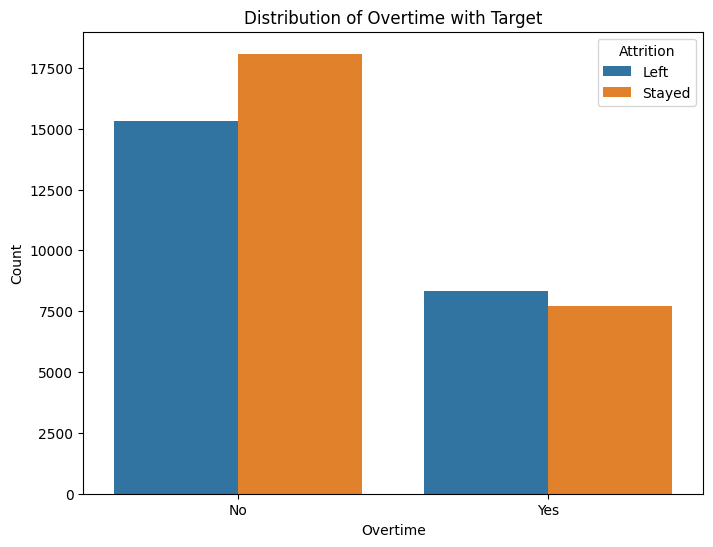

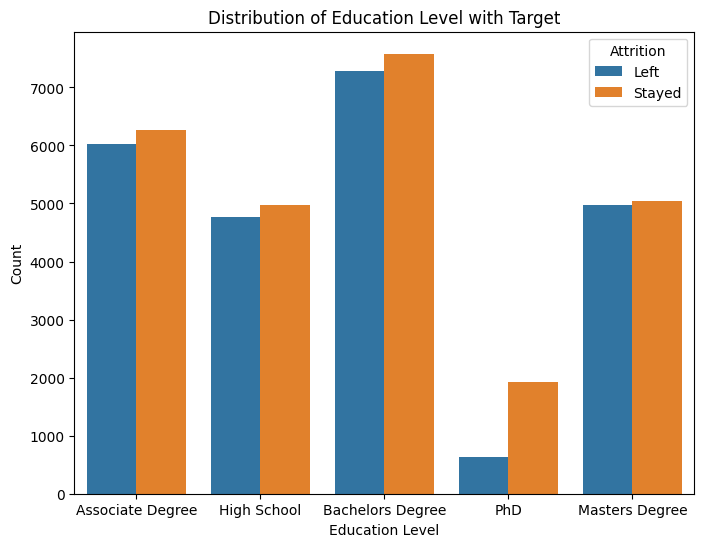

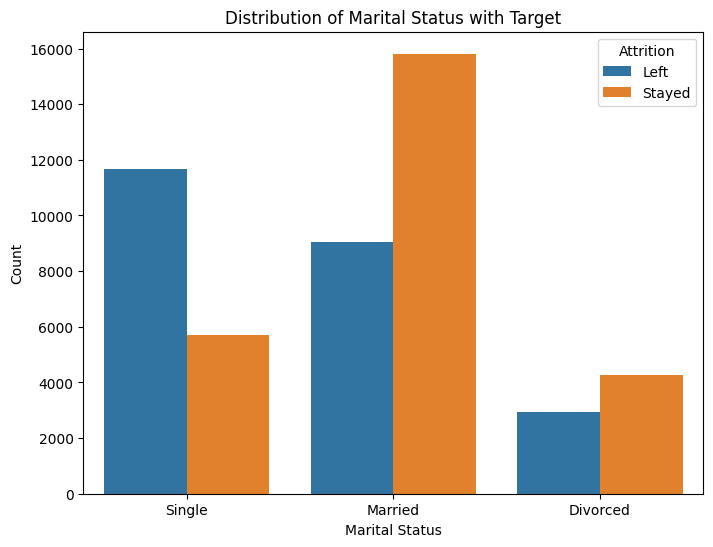

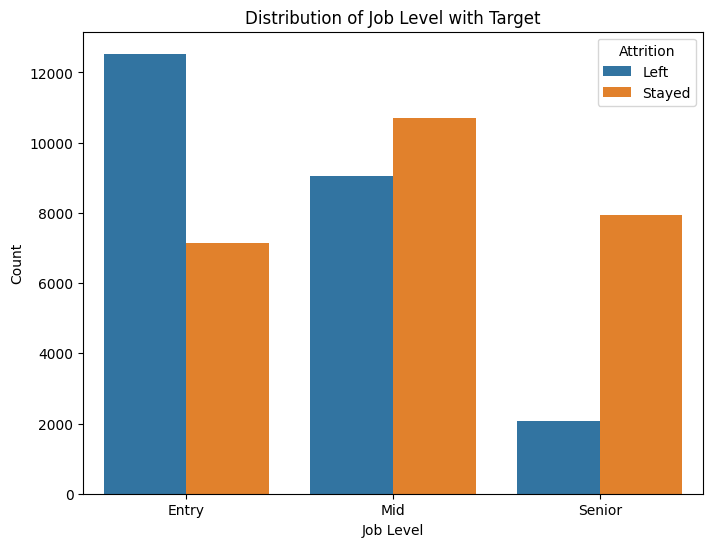

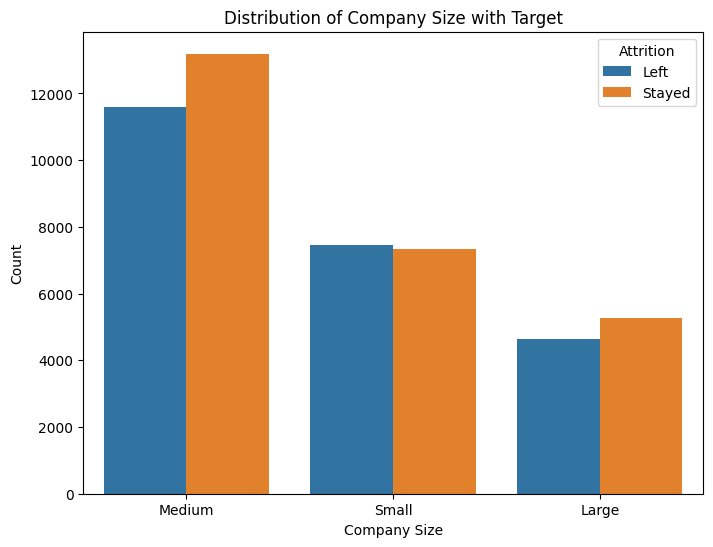

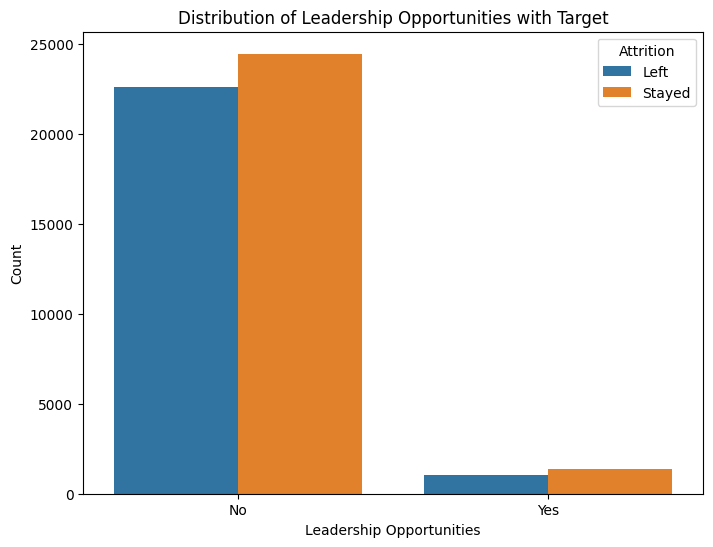

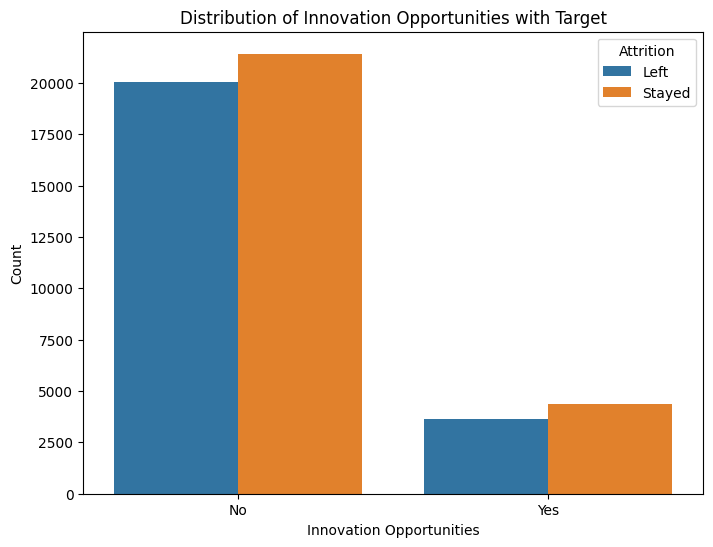

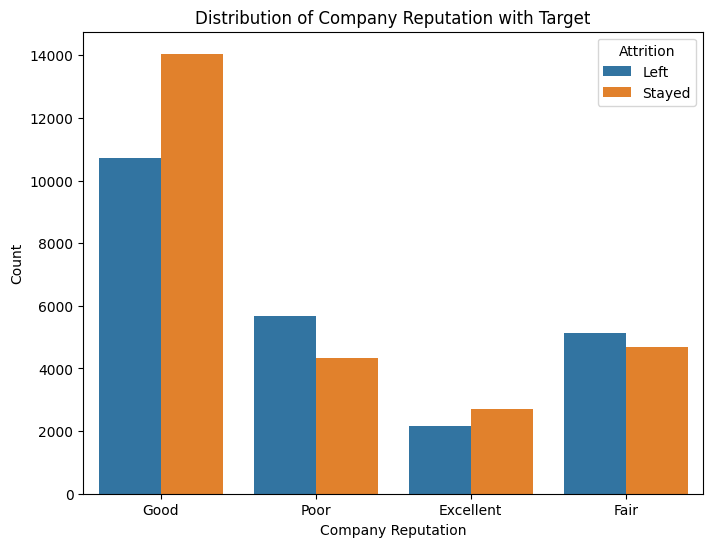

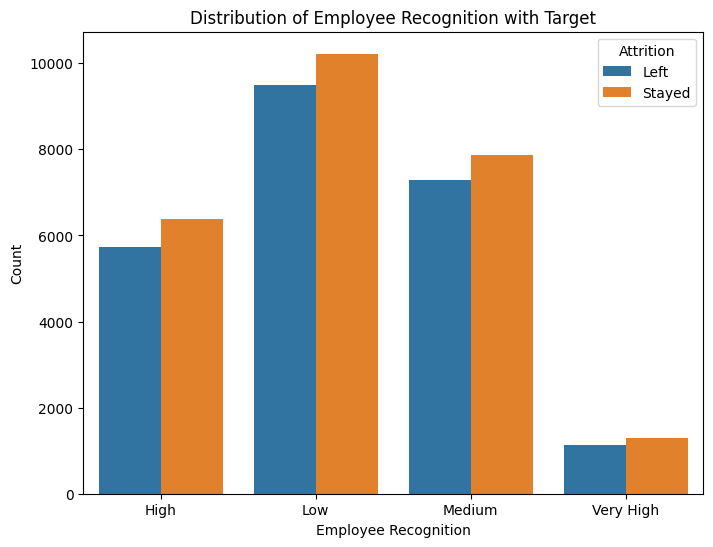

In [ ]:
# Plot distribution for each categorical column with target variable
# Select categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
# Plot distribution for each categorical column with target
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue=y_train, data=X_train)
    plt.title(f'Distribution of {column} with Target')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    plt.close()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [ ]:
# Select numerical columns
numerical_columns = X_validation.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

5.1.2 Plot distribution of numerical columns

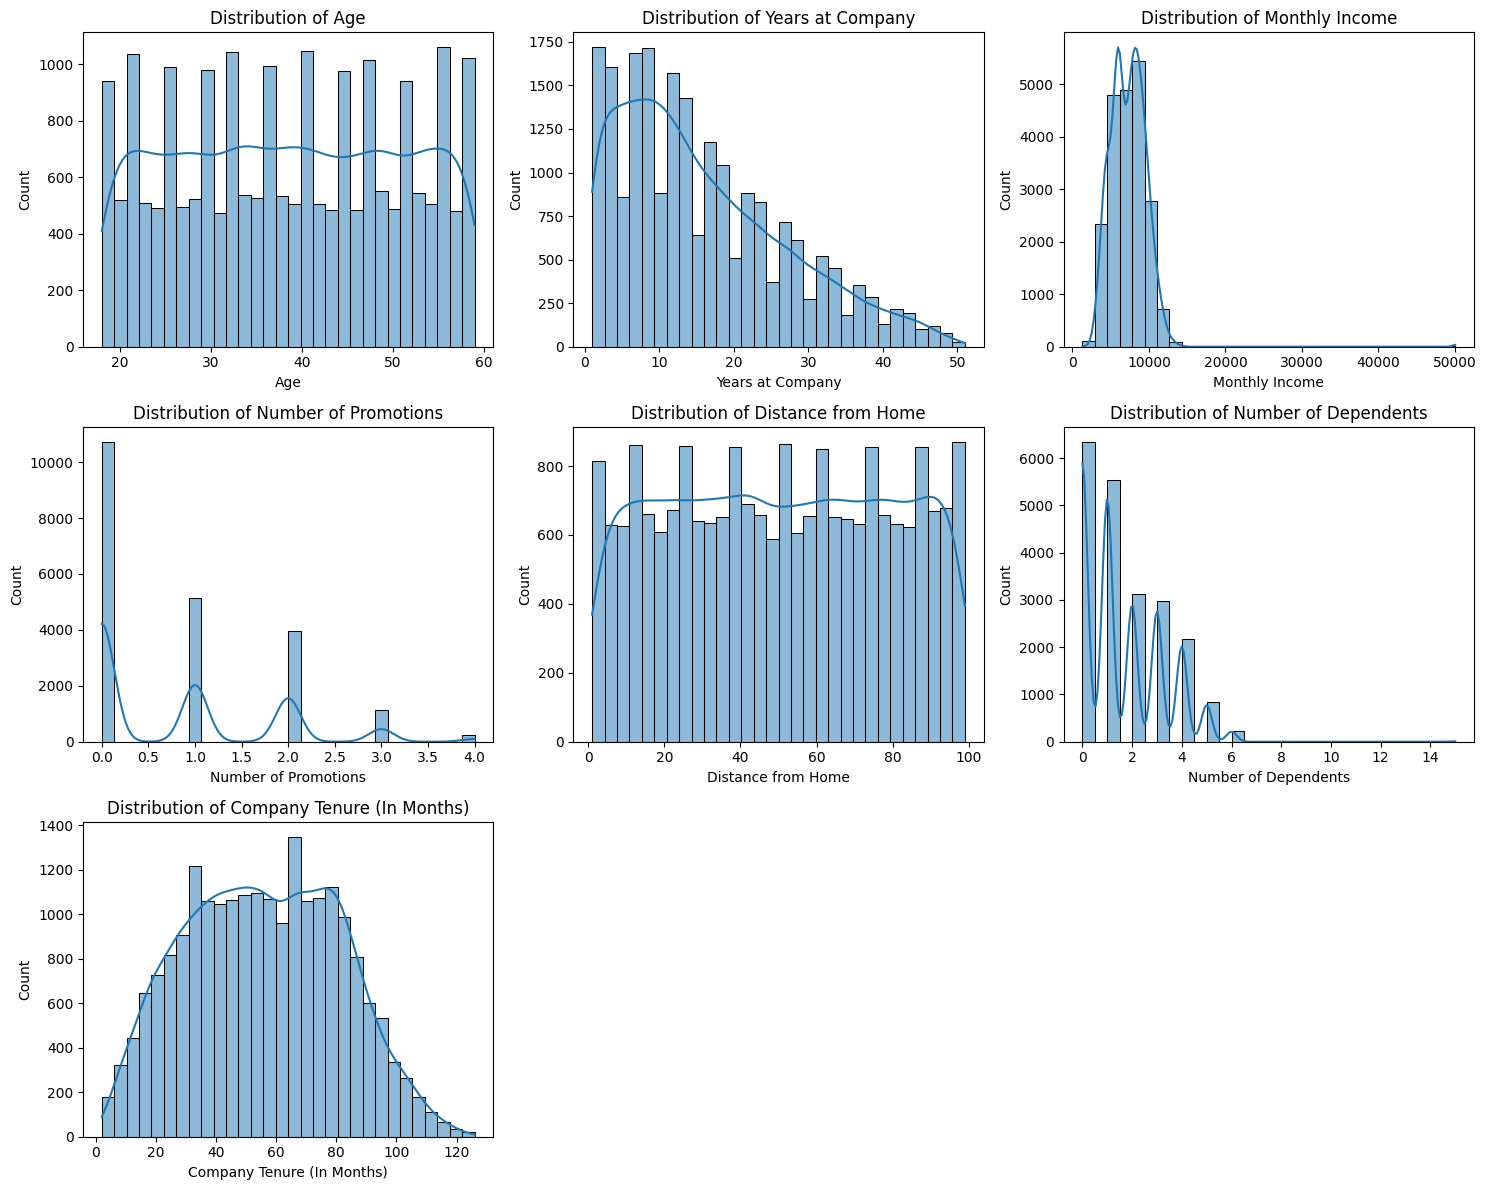

In [ ]:
# Plot all the numerical columns to understand their distribution
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(X_validation[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

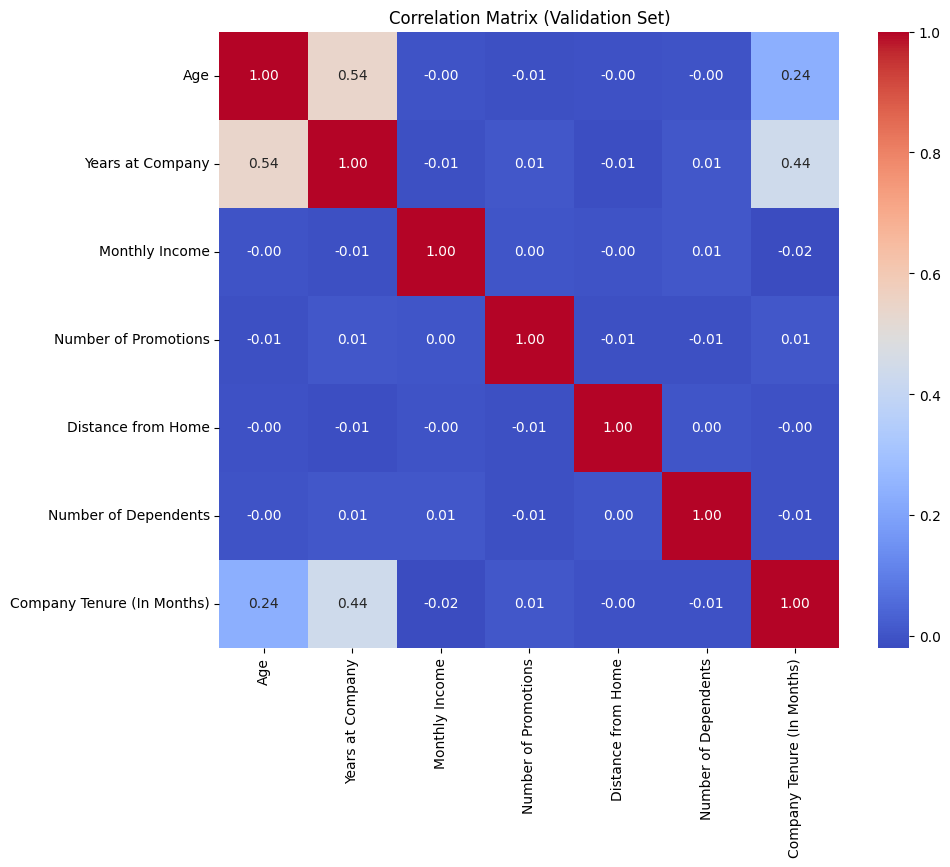

In [ ]:
# Create correlation matrix for numerical columns
val_corr_matrix = X_validation[numerical_columns].corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(val_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Validation Set)')
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

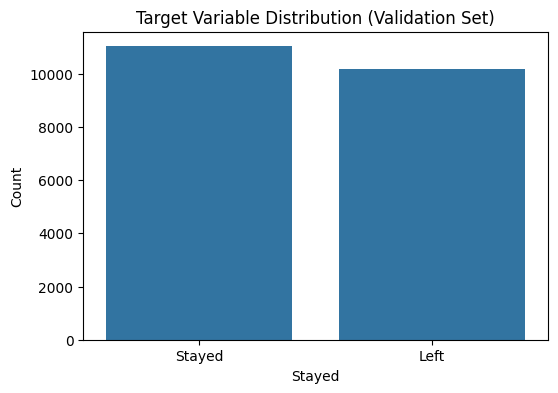

In [ ]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_validation)
plt.title('Target Variable Distribution (Validation Set)')
plt.xlabel('Stayed')
plt.ylabel('Count')
plt.show()


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

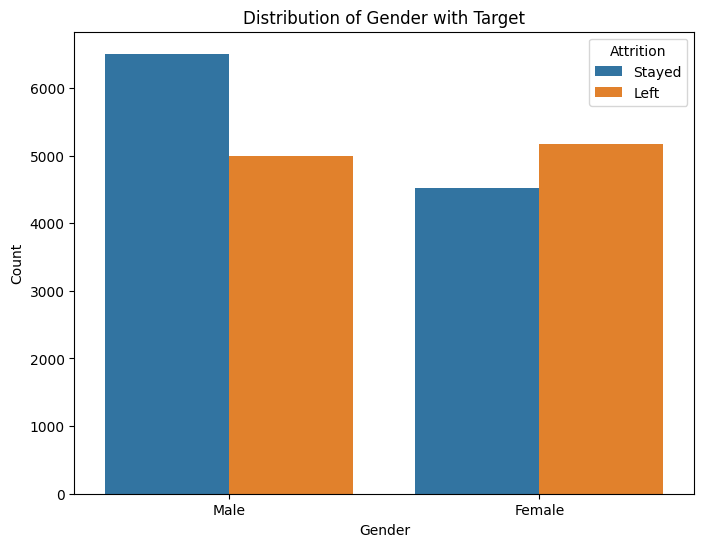

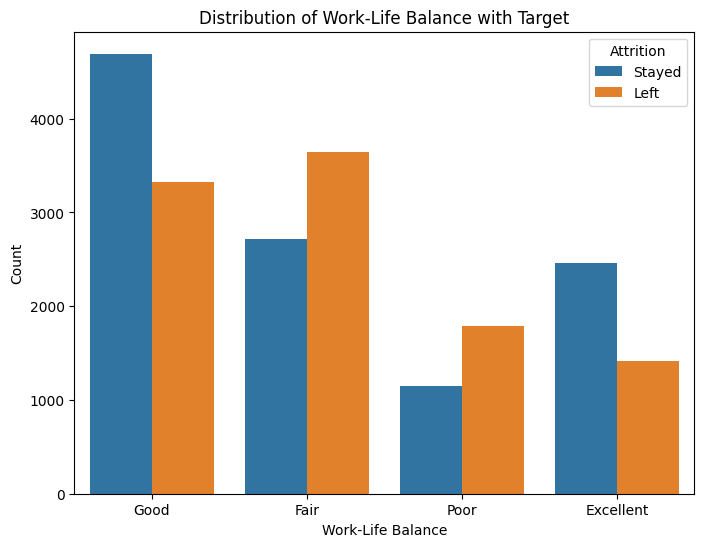

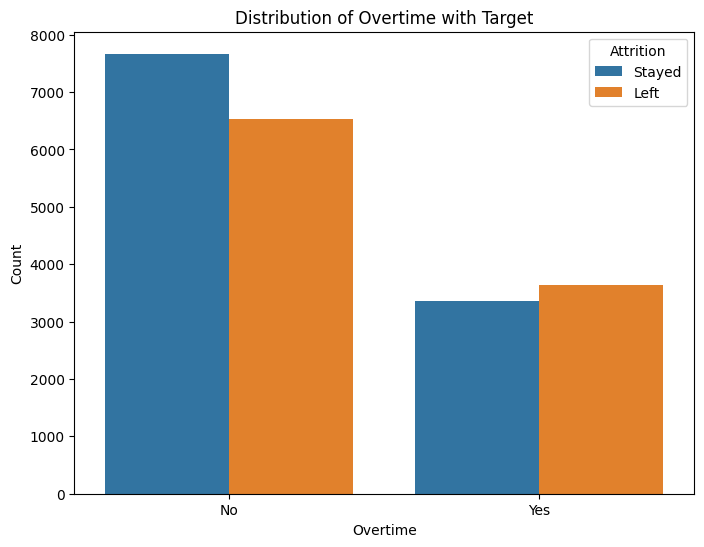

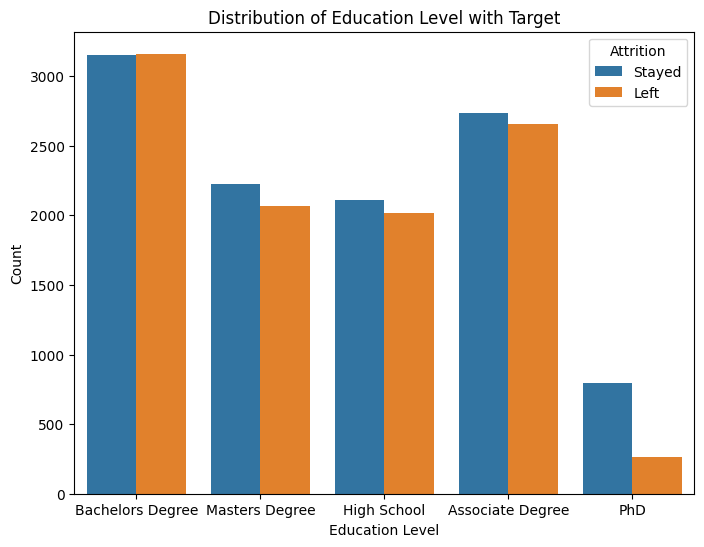

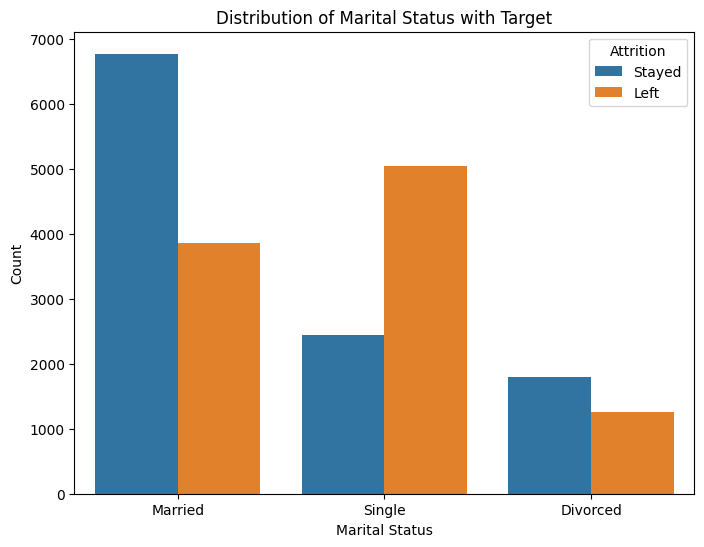

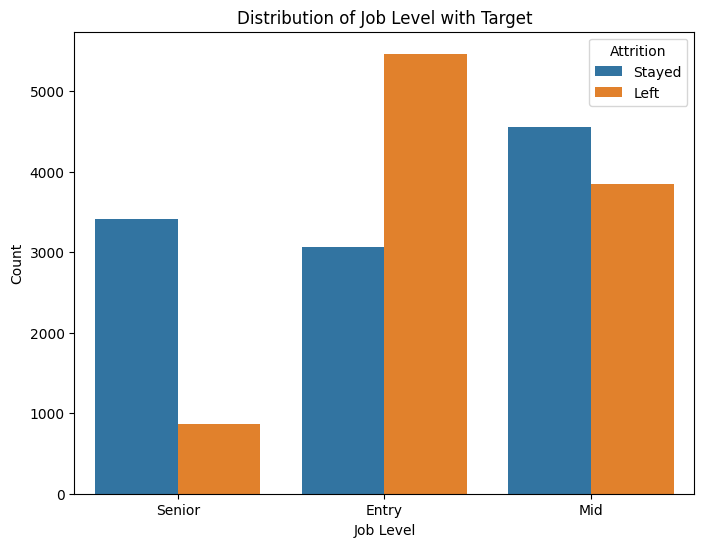

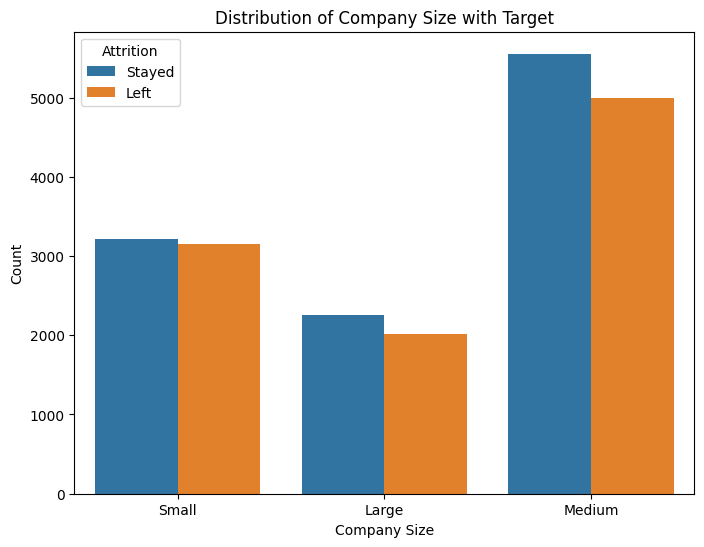

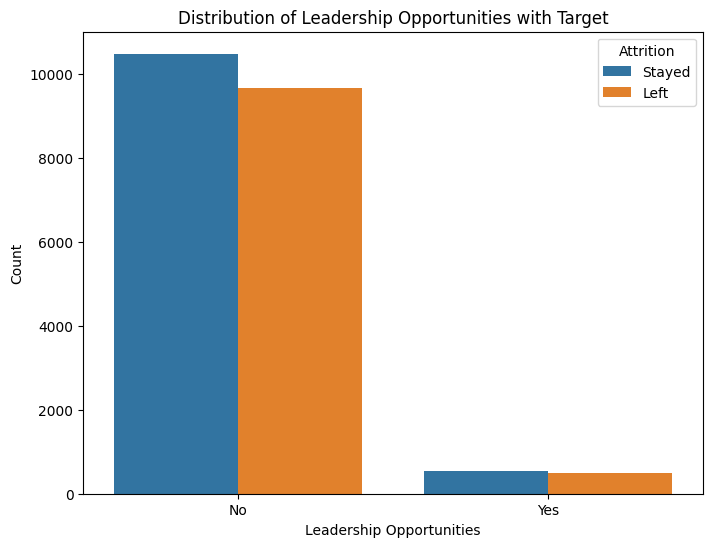

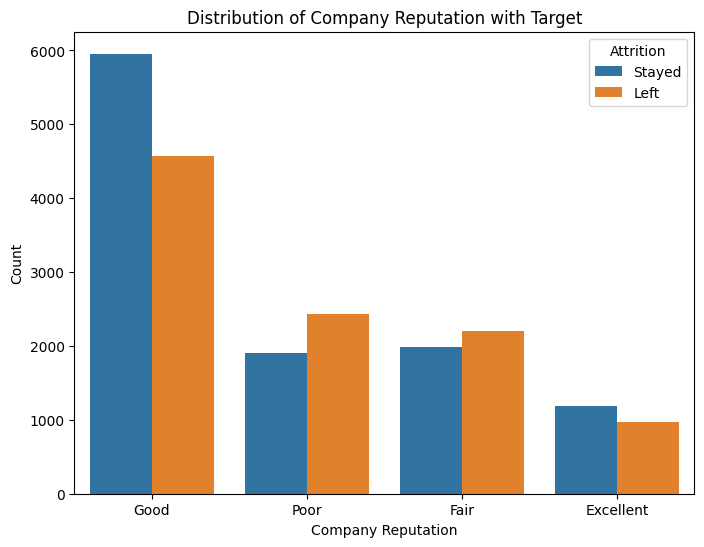

In [ ]:
# Plot distribution for each categorical column with target variable
# Select categorical columns
categorical_columns_validation = X_validation.select_dtypes(include=['object']).columns
# Plot distribution for each categorical column with target
for column in categorical_columns_validation:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue=y_validation, data=X_validation)
    plt.title(f'Distribution of {column} with Target')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    plt.close()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [ ]:
# Check the categorical columns
categorical_columns_train = X_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns (Train):", categorical_columns_train)
categorical_cols_validation = X_validation.select_dtypes(include='object').columns.tolist()
print("Categorical Columns (Validation):", categorical_cols_validation)


Categorical Columns (Train): ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']
Categorical Columns (Validation): ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummies = pd.get_dummies(X_train[categorical_columns_train], drop_first=True)
X_train_dummies = X_train_dummies.astype(int)
# Add the results to the master DataFrame
np.asarray(X_train_dummies)
X_train = pd.concat([X_train, X_train_dummies], axis=1)
X_train.head()

Age  Gender  Years at Company   Job Role  Monthly Income  \
41465   46  Female                26  Education            4617   
69350   43    Male                26  Education            4447   
28247   27    Male                 8    Finance            9762   
3217    47  Female                29      Media            5244   
73636   25  Female                10  Education            4455   

      Work-Life Balance Job Satisfaction Performance Rating  \
41465              Fair             High                Low   
69350              Good             High               High   
28247         Excellent        Very High      Below Average   
3217               Fair           Medium            Average   
73636              Good             High               High   

       Number of Promotions Overtime  ...  Company Size_Small Remote Work_Yes  \
41465                     2       No  ...                   0               0   
69350                     3       No  ...                   1               0   
28247                     0      Yes  ...                   0               0   
3217                      2      Yes  ...                   0               0   
73636                     0       No  ...                   0               0   

      Leadership Opportunities_Yes  Innovation Opportunities_Yes  \
41465                            0                             0   
69350                            0                             1   
28247                            0                             1   
3217                             0                             0   
73636                            0                             0   

      Company Reputation_Fair Company Reputation_Good  \
41465                       0                       1   
69350                       0                       0   
28247                       0                       1   
3217                        0                       0   
73636                       0                       1   

       Company Reputation_Poor Employee Recognition_Low  \
41465                        0                        0   
69350                        1                        1   
28247                        0                        1   
3217                         0                        1   
73636                        0                        0   

      Employee Recognition_Medium Employee Recognition_Very High  
41465                           0                              0  
69350                           0                              0  
28247                           0                              0  
3217                            0                              0  
73636                           1                              0  

[5 rows x 56 columns]

Now, drop the original categorical columns and check the DataFrame

In [ ]:
# Drop the original categorical columns and check the DataFrame
X_train = X_train.drop(columns=categorical_columns_train, axis=1)
X_train.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
41465   46                26            4617                     2   
69350   43                26            4447                     3   
28247   27                 8            9762                     0   
3217    47                29            5244                     2   
73636   25                10            4455                     0   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
41465                59.0                     2                        92.0   
69350                64.0                     0                       103.0   
28247                84.0                     1                        16.0   
3217                 59.0                     1                        74.0   
73636                36.0                     0                        62.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
41465            0                 0                    0  ...   
69350            1                 0                    0  ...   
28247            1                 1                    0  ...   
3217             0                 0                    0  ...   
73636            0                 0                    0  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
41465                   0                0                             0   
69350                   1                0                             0   
28247                   0                0                             0   
3217                    0                0                             0   
73636                   0                0                             0   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
41465                             0                        0   
69350                             1                        0   
28247                             1                        0   
3217                              0                        0   
73636                             0                        0   

       Company Reputation_Good  Company Reputation_Poor  \
41465                        1                        0   
69350                        0                        1   
28247                        1                        0   
3217                         0                        0   
73636                        1                        0   

       Employee Recognition_Low  Employee Recognition_Medium  \
41465                         0                            0   
69350                         1                            0   
28247                         1                            0   
3217                          1                            0   
73636                         0                            1   

       Employee Recognition_Very High  
41465                               0  
69350                               0  
28247                               0  
3217                                0  
73636                               0  

[5 rows x 41 columns]

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for independent columns
X_validation_dummies = pd.get_dummies(X_validation[categorical_cols_validation], drop_first=True)
X_validation_dummies = X_validation_dummies.astype(int)
# Add the results to the master DataFrame
np.asarray(X_validation_dummies)
X_validation = pd.concat([X_validation, X_validation_dummies], axis=1)
X_validation.head()


Age  Gender  Years at Company    Job Role  Monthly Income  \
23813   46    Male                 1  Healthcare            7740   
14537   32    Male                 6     Finance            8779   
45192   53    Male                10  Technology           11683   
13765   50  Female                 2  Technology            7305   
3411    48    Male                24  Healthcare           10114   

      Work-Life Balance Job Satisfaction Performance Rating  \
23813              Good        Very High               High   
14537              Fair             High            Average   
45192              Poor           Medium            Average   
13765              Poor              Low            Average   
3411               Good           Medium                Low   

       Number of Promotions Overtime  ...  Company Size_Small Remote Work_Yes  \
23813                     3       No  ...                   1               0   
14537                     1       No  ...                   0               1   
45192                     1       No  ...                   0               0   
13765                     2      Yes  ...                   0               0   
3411                      0       No  ...                   0               0   

      Leadership Opportunities_Yes  Innovation Opportunities_Yes  \
23813                            0                             0   
14537                            0                             0   
45192                            0                             0   
13765                            0                             1   
3411                             0                             0   

      Company Reputation_Fair Company Reputation_Good  \
23813                       0                       1   
14537                       0                       0   
45192                       0                       1   
13765                       1                       0   
3411                        0                       0   

       Company Reputation_Poor Employee Recognition_Low  \
23813                        0                        1   
14537                        1                        0   
45192                        0                        0   
13765                        0                        0   
3411                         0                        0   

      Employee Recognition_Medium Employee Recognition_Very High  
23813                           0                              0  
14537                           0                              0  
45192                           1                              0  
13765                           0                              0  
3411                            0                              0  

[5 rows x 56 columns]

Now, drop the original categorical columns and check the DataFrame

In [ ]:
# Drop categorical columns and check the DataFrame
X_validation = X_validation.drop(columns=categorical_cols_validation, axis=1)
X_validation.head()


Age  Years at Company  Monthly Income  Number of Promotions  \
23813   46                 1            7740                     3   
14537   32                 6            8779                     1   
45192   53                10           11683                     1   
13765   50                 2            7305                     2   
3411    48                24           10114                     0   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
23813                78.0                     2                         3.0   
14537                91.0                     0                        35.0   
45192                71.0                     1                        39.0   
13765                71.0                     1                         3.0   
3411                  2.0                     1                        64.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
23813            1                 0                    1  ...   
14537            1                 1                    0  ...   
45192            1                 0                    0  ...   
13765            0                 0                    0  ...   
3411             1                 0                    1  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
23813                   1                0                             0   
14537                   0                1                             0   
45192                   0                0                             0   
13765                   0                0                             0   
3411                    0                0                             0   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
23813                             0                        0   
14537                             0                        0   
45192                             0                        0   
13765                             1                        1   
3411                              0                        0   

       Company Reputation_Good  Company Reputation_Poor  \
23813                        1                        0   
14537                        0                        1   
45192                        1                        0   
13765                        0                        0   
3411                         0                        0   

       Employee Recognition_Low  Employee Recognition_Medium  \
23813                         1                            0   
14537                         0                            0   
45192                         0                            1   
13765                         0                            0   
3411                          0                            0   

       Employee Recognition_Very High  
23813                               0  
14537                               0  
45192                               0  
13765                               0  
3411                                0  

[5 rows x 41 columns]

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [ ]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train_df = pd.DataFrame(y_train, columns=['Attrition'])
y_validation_df = pd.DataFrame(y_validation, columns=['Attrition'])


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_dummies = pd.get_dummies(y_train_df, drop_first=True)
y_train_dummies = y_train_dummies.astype(int)

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for dependent column
y_validation_dummies = pd.get_dummies(y_validation_df, drop_first=True)
y_validation_dummies = y_validation_dummies.astype(int)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [ ]:
# Drop redundant columns from both train and validation
np.asarray(y_train_df)
y_train_df = pd.concat([y_train_df, y_train_dummies], axis=1)
np.asarray(y_validation_df)
y_validation_df = pd.concat([y_validation_df, y_validation_dummies], axis=1)
y_train_df = y_train_df.drop(columns=['Attrition'], axis=1)
y_validation_df = y_validation_df.drop(columns=['Attrition'], axis=1)



### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [ ]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
41465   46                26            4617                     2   
69350   43                26            4447                     3   
28247   27                 8            9762                     0   
3217    47                29            5244                     2   
73636   25                10            4455                     0   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
41465                59.0                     2                        92.0   
69350                64.0                     0                       103.0   
28247                84.0                     1                        16.0   
3217                 59.0                     1                        74.0   
73636                36.0                     0                        62.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
41465            0                 0                    0  ...   
69350            1                 0                    0  ...   
28247            1                 1                    0  ...   
3217             0                 0                    0  ...   
73636            0                 0                    0  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
41465                   0                0                             0   
69350                   1                0                             0   
28247                   0                0                             0   
3217                    0                0                             0   
73636                   0                0                             0   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
41465                             0                        0   
69350                             1                        0   
28247                             1                        0   
3217                              0                        0   
73636                             0                        0   

       Company Reputation_Good  Company Reputation_Poor  \
41465                        1                        0   
69350                        0                        1   
28247                        1                        0   
3217                         0                        0   
73636                        1                        0   

       Employee Recognition_Low  Employee Recognition_Medium  \
41465                         0                            0   
69350                         1                            0   
28247                         1                            0   
3217                          1                            0   
73636                         0                            1   

       Employee Recognition_Very High  
41465                               0  
69350                               0  
28247                               0  
3217                                0  
73636                               0  

[5 rows x 41 columns]

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [ ]:
# Scale the numeric features present in the training set
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Scale the numerical features present in the validation set
X_validation[numerical_columns] = scaler.transform(X_validation[numerical_columns])



## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [ ]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [ ]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train_df)



In [ ]:
# Display the features selected by RFE
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Poor', 'Overtime_Yes', 'Education Level_PhD',
       'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior',
       'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [ ]:
# Put columns selected by RFE into variable 'col'
col = selected_features



### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [ ]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [ ]:
# View the training data
X_train.head()


Years at Company  Number of Promotions  Distance from Home  \
41465          0.919879              1.169006            0.319585   
69350          0.919879              2.172605            0.494961   
28247         -0.685603             -0.838194            1.196466   
3217           1.187460              1.169006            0.319585   
73636         -0.507216             -0.838194           -0.487146   

       Number of Dependents  Gender_Male  Work-Life Balance_Fair  \
41465              0.218921    -1.105623                1.512376   
69350             -1.050275     0.904468               -0.661211   
28247             -0.415677     0.904468               -0.661211   
3217              -0.415677    -1.105623                1.512376   
73636             -1.050275    -1.105623               -0.661211   

       Work-Life Balance_Poor  Overtime_Yes  Education Level_PhD  \
41465               -0.401636     -0.693207            -0.232901   
69350               -0.401636     -0.693207            -0.232901   
28247               -0.401636      1.442570            -0.232901   
3217                -0.401636      1.442570             4.293662   
73636               -0.401636     -0.693207            -0.232901   

       Marital Status_Single  Job Level_Mid  Job Level_Senior  \
41465               1.358866      -0.815651         -0.504237   
69350               1.358866      -0.815651         -0.504237   
28247               1.358866       1.226015         -0.504237   
3217               -0.735908       1.226015         -0.504237   
73636               1.358866      -0.815651         -0.504237   

       Remote Work_Yes  Company Reputation_Fair  Company Reputation_Poor  
41465        -0.464635                -0.497509                -0.503922  
69350        -0.464635                -0.497509                 1.984435  
28247        -0.464635                -0.497509                -0.503922  
3217         -0.464635                -0.497509                -0.503922  
73636        -0.464635                -0.497509                -0.503922

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [ ]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train = sm.add_constant(X_train)


7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [ ]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
model = sm.Logit(y_train_df, X_train).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.493274
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Attrition_Stayed   No. Observations:                49444
Model:                          Logit   Df Residuals:                    49428
Method:                           MLE   Df Model:                           15
Date:                Tue, 27 May 2025   Pseudo R-squ.:                  0.2874
Time:                        12:38:21   Log-Likelihood:                -24389.
converged:                       True   LL-Null:                       -34226.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1575      0.011     13.934      0.000       0.135   

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [ ]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Make a VIF DataFrame for all the variables present
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data.sort_values(by='VIF', ascending=False)


feature       VIF
12         Job Level_Senior  1.203929
11            Job Level_Mid  1.203872
7    Work-Life Balance_Poor  1.076341
6    Work-Life Balance_Fair  1.076104
15  Company Reputation_Poor  1.067276
14  Company Reputation_Fair  1.067191
10    Marital Status_Single  1.000379
3        Distance from Home  1.000341
5               Gender_Male  1.000331
8              Overtime_Yes  1.000326
9       Education Level_PhD  1.000312
2      Number of Promotions  1.000239
4      Number of Dependents  1.000215
1          Years at Company  1.000132
13          Remote Work_Yes  1.000131
0                     const  1.000000

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [ ]:
# Predict the probabilities on the training set
y_train_pred = model.predict(X_train)

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [ ]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1)


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [ ]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
predicted_probability = pd.DataFrame({'Actual': y_train_df['Attrition_Stayed'], 'Predicted Prob': y_train_pred})
predicted_probability.head()


Actual  Predicted Prob
41465       0        0.084027
69350       0        0.180353
28247       0        0.219073
3217        0        0.812696
73636       0        0.106020

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [ ]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
predicted_probability['Predicted'] = predicted_probability['Predicted Prob'].apply(lambda x: 1 if x > 0.5 else 0)
predicted_probability.head()


Actual  Predicted Prob  Predicted
41465       0        0.084027          0
69350       0        0.180353          0
28247       0        0.219073          0
3217        0        0.812696          1
73636       0        0.106020          0

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [ ]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy = metrics.accuracy_score(predicted_probability['Actual'], predicted_probability['Predicted'])
print("Accuracy:", accuracy)


Accuracy: 0.7478359356039156


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [ ]:
# Create confusion matrix
confusion_matrix = metrics.confusion_matrix(predicted_probability['Actual'], predicted_probability['Predicted'])
print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[17367  6292]
 [ 6176 19609]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [ ]:
# Create variables for true positive, true negative, false positive and false negative
true_positive = confusion_matrix[1, 1]
true_negative = confusion_matrix[0, 0]
false_positive = confusion_matrix[0, 1]
false_negative = confusion_matrix[1, 0]


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [ ]:
# Calculate sensitivity
sensitivity = true_positive / (true_positive + false_negative)
print("Sensitivity:", sensitivity)


Sensitivity: 0.7604808997479154


In [ ]:
# Calculate specificity
specificity = true_negative / (true_negative + false_positive)
print("Specificity:", specificity)

Specificity: 0.7340546937740394


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [ ]:
# Calculate precision
precision = true_positive / (true_positive + false_positive)
print("Precision:", precision)


Precision: 0.7570750164086328


In [ ]:
# Calculate recall
recall = true_positive / (true_positive + false_negative)
print("Recall:", recall)


Recall: 0.7604808997479154


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [ ]:
# Define ROC function
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds


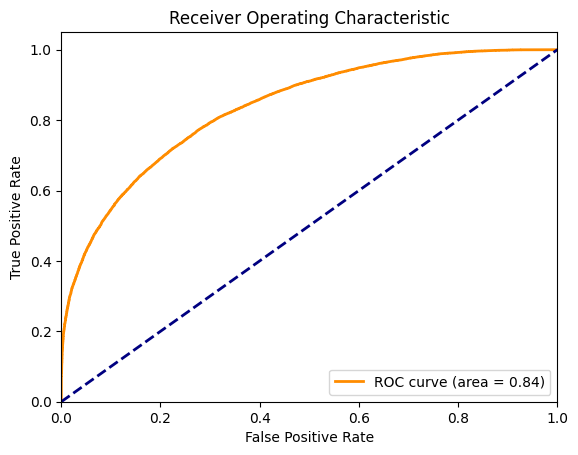

In [ ]:
# Call the ROC function
fpr, tpr, thresholds = plot_roc_curve(predicted_probability['Actual'], predicted_probability['Predicted Prob'])



**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [ ]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
predicted_probability['Cutoff 0.1'] = predicted_probability['Predicted Prob'].apply(lambda x: 1 if x > 0.1 else 0)
predicted_probability


Output hidden; open in https://colab.research.google.com to view.

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [ ]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracy_values = []
sensitivity_values = []
specificity_values = []



In [ ]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
for cutoff in cutoff_values:
    predicted_probability[f'Cutoff {cutoff}'] = predicted_probability['Predicted Prob'].apply(lambda x: 1 if x > cutoff else 0)
    confusion_matrix = metrics.confusion_matrix(predicted_probability['Actual'], predicted_probability[f'Cutoff {cutoff}'])
    true_positive = confusion_matrix[1, 1]
    true_negative = confusion_matrix[0, 0]
    false_positive = confusion_matrix[0, 1]
    false_negative = confusion_matrix[1, 0]
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive +false_negative)
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)
    accuracy_values.append(accuracy)
    sensitivity_values.append(sensitivity)
    specificity_values.append(specificity)

# Plot the metrics after the loop has finished
plt.figure(figsize=(10, 6)) # Create the figure once outside the loop
plt.plot(cutoff_values, accuracy_values, label='Accuracy')
plt.plot(cutoff_values, sensitivity_values, label='Sensitivity')
plt.plot(cutoff_values, specificity_values, label='Specificity')
plt.xlabel('Probability Cutoff')
plt.ylabel('Metric Value')
plt.title('Performance Metrics at Different Probability Cutoffs')
plt.legend()
plt.grid(True) # Add a grid for better readability
plt.show()



7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [ ]:
# Create a column for final prediction based on the optimal cutoff
predicted_probability['Final Prediction'] = predicted_probability['Cutoff 0.5'].apply(lambda x: 1 if x > 0.5 else 0)
predicted_probability.head()


Actual  Predicted Prob  Predicted  Cutoff 0.1  Cutoff 0.2  Cutoff 0.3  \
41465       0        0.084027          0           0           0           0   
69350       0        0.180353          0           1           0           0   
28247       0        0.219073          0           1           1           0   
3217        0        0.812696          1           1           1           1   
73636       0        0.106020          0           1           0           0   

       Cutoff 0.4  Cutoff 0.5  Cutoff 0.6  Cutoff 0.7  Cutoff 0.8  Cutoff 0.9  \
41465           0           0           0           0           0           0   
69350           0           0           0           0           0           0   
28247           0           0           0           0           0           0   
3217            1           1           1           1           1           0   
73636           0           0           0           0           0           0   

       Final Prediction  
41465                 0  
69350                 0  
28247                 0  
3217                  1  
73636                 0

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [ ]:
# Calculate the accuracy
accuracy = metrics.accuracy_score(predicted_probability['Actual'], predicted_probability['Final Prediction'])
print("Accuracy:", accuracy)


Accuracy: 0.7478359356039156


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [ ]:
# Create the confusion matrix once again
confusion_matrix = metrics.confusion_matrix(predicted_probability['Actual'], predicted_probability['Final Prediction'])
print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[17367  6292]
 [ 6176 19609]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [ ]:
# Create variables for true positive, true negative, false positive and false negative
true_positive = confusion_matrix[1, 1]
true_negative = confusion_matrix[0, 0]
false_positive = confusion_matrix[0, 1]
false_negative = confusion_matrix[1, 0]


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [ ]:
# Calculate Sensitivity
Sensitivity = true_positive / (true_positive + false_negative)
print("Sensitivity:", Sensitivity)



Sensitivity: 0.7604808997479154


In [ ]:
# Calculate Specificity
Specificity = true_negative / (true_negative + false_positive)
print("Specificity:", Specificity)



Specificity: 0.7340546937740394


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [ ]:
# Calculate PrecisionS
Precision = true_positive / (true_positive + false_positive)
print("Precision:", Precision)


Precision: 0.7570750164086328


In [ ]:
# Calculate Recall
Recall = true_positive / (true_positive + false_negative)
print("Recall:", Recall)


Recall: 0.7604808997479154


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [ ]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [ ]:
# Check actual and predicted values from initial model
predicted_probability.head()


Actual  Predicted Prob  Predicted  Cutoff 0.1  Cutoff 0.2  Cutoff 0.3  \
41465       0        0.084027          0           0           0           0   
69350       0        0.180353          0           1           0           0   
28247       0        0.219073          0           1           1           0   
3217        0        0.812696          1           1           1           1   
73636       0        0.106020          0           1           0           0   

       Cutoff 0.4  Cutoff 0.5  Cutoff 0.6  Cutoff 0.7  Cutoff 0.8  Cutoff 0.9  \
41465           0           0           0           0           0           0   
69350           0           0           0           0           0           0   
28247           0           0           0           0           0           0   
3217            1           1           1           1           1           0   
73636           0           0           0           0           0           0   

       Final Prediction  
41465                 0  
69350                 0  
28247                 0  
3217                  1  
73636                 0

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

In [ ]:
# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(predicted_probability['Actual'], predicted_probability['Predicted Prob'])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [ ]:
# Select the relevant features for validation set
X_validation = X_validation[col]
X_validation.head()


Years at Company  Number of Promotions  Distance from Home  \
23813         -1.309957              2.172605            0.986015   
14537         -0.863990              0.165406            1.441993   
45192         -0.507216              0.165406            0.740488   
13765         -1.220764              1.169006            0.740488   
3411           0.741492             -0.838194           -1.679706   

       Number of Dependents  Gender_Male  Work-Life Balance_Fair  \
23813              0.218921     0.904468               -0.661211   
14537             -1.050275     0.904468                1.512376   
45192             -0.415677     0.904468               -0.661211   
13765             -0.415677    -1.105623               -0.661211   
3411              -0.415677     0.904468               -0.661211   

       Work-Life Balance_Poor  Overtime_Yes  Education Level_PhD  \
23813               -0.401636     -0.693207            -0.232901   
14537               -0.401636     -0.693207            -0.232901   
45192                2.489816     -0.693207            -0.232901   
13765                2.489816      1.442570            -0.232901   
3411                -0.401636     -0.693207            -0.232901   

       Marital Status_Single  Job Level_Mid  Job Level_Senior  \
23813              -0.735908      -0.815651          1.983193   
14537               1.358866      -0.815651         -0.504237   
45192              -0.735908      -0.815651         -0.504237   
13765              -0.735908      -0.815651         -0.504237   
3411               -0.735908      -0.815651          1.983193   

       Remote Work_Yes  Company Reputation_Fair  Company Reputation_Poor  
23813        -0.464635                -0.497509                -0.503922  
14537         2.152226                -0.497509                 1.984435  
45192        -0.464635                -0.497509                -0.503922  
13765        -0.464635                 2.010016                -0.503922  
3411         -0.464635                -0.497509                -0.503922

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [ ]:
# Add constant to X_validation
X_validation = sm.add_constant(X_validation)


8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [ ]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = model.predict(X_validation)
y_validation_pred = y_validation_pred.values.reshape(-1)

# View predictions
y_validation_pred



array([0.96462515, 0.11323224, 0.26193415, ..., 0.89625511, 0.80623966,
       0.92585274])

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [ ]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame({'Predicted Prob': y_validation_pred})
predicted_probability.head()

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame({'Actual': y_validation_df['Attrition_Stayed']})
actual.head()

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
actual.reset_index(drop=True, inplace=True)
predicted_probability.reset_index(drop=True, inplace=True)


# Append 'actual' and 'predicted_probability' side by side
predicted_probability = pd.concat([actual, predicted_probability], axis=1)
predicted_probability.head()








Actual  Predicted Prob
0       1        0.964625
1       0        0.113232
2       0        0.261934
3       0        0.080332
4       1        0.971728

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [ ]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
predicted_probability['Final Prediction'] = predicted_probability['Predicted Prob'].apply(lambda x: 1 if x > 0.5 else 0)

# Check the DataFrame
predicted_probability.head()


Actual  Predicted Prob  Final Prediction
0       1        0.964625                 1
1       0        0.113232                 0
2       0        0.261934                 0
3       0        0.080332                 0
4       1        0.971728                 1

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [ ]:
# Calculate the overall accuracy
accuracy = metrics.accuracy_score(predicted_probability['Actual'], predicted_probability['Final Prediction'])
print("Accuracy:", accuracy)

Accuracy: 0.7406918031239678


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [ ]:
# Create confusion matrix
confusion_matrix = metrics.confusion_matrix(predicted_probability['Actual'], predicted_probability['Final Prediction'])
print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[7410 2756]
 [2739 8286]]


In [ ]:
# Create variables for true positive, true negative, false positive and false negative
true_positive = confusion_matrix[1, 1]
true_negative = confusion_matrix[0, 0]
false_positive = confusion_matrix[0, 1]
false_negative = confusion_matrix[1, 0]



### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [ ]:
# Calculate sensitivity
sensitivity = true_positive / (true_positive + false_negative)
print("Sensitivity:", sensitivity)


Sensitivity: 0.7515646258503401


In [ ]:
# Calculate specificity
specificity = true_negative / (true_negative + false_positive)
print("Specificity:", specificity)


Specificity: 0.7289002557544757


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [ ]:
# Calculate precision
precision = true_positive / (true_positive + false_positive)
print("Precision:", precision)


Precision: 0.750407534866872


In [ ]:
# Calculate recall
recall = true_positive / (true_positive + false_negative)
print("Recall:", recall)



Recall: 0.7515646258503401


## Conclusion





* Cleaned and preprocessed the data
* Explored and visualized trends
* Built a logistic regression model
* Optimized it using ROC/PR analysis
* Evaluated performance on both training and validation sets

